<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO HYDROLOGY TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Monitoring Land Cover and Agricultural Crops in Alsace </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>

***




# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the Python environment](#2.-Setting-up-the-Python-environment)
    - [2.1. Required Python modules](#2.1-Required-Python-modules)
- [3. Data Access](#3.-Data-Access)
    - [3.1. Presentation of the products used](#3.1.-Presentation-of-the-products-used)
    - [3.2. Retrieving the data](#3.2.-Retrieving-the-data)
- [4. The CORINE Land Cover dataset](#4.-The-CORINE-Land-Cover-dataset)
    - [4.1. First Look](#4.1.-First-look)
    - [4.2. Agricultural profile of Alsace](#4.2.-Agricultural-profile-of-Alsace)
- [5. Vegetation Phenology](#5.-Vegetation-Phenology)
    - [5.1. Season Lengths](#5.1.-Season-Lengths)
    - [5.2. Focus on fruit trees and berry plantations](#5.-Focus-on-fruit-trees-and-berry-plantations)
- [6. Using temperature and precipitation data](#6.-Using-Temperature-and-Precipitation-data)
- [7. Conclusion](#7.-Conclusion)
- [8. Exercises](#8.-Exercises)

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


Monitoring vegetation is crucial for a variety of environmental, ecological, and socio-economic reasons. One of the primary reasons is its direct impact on biodiversity and ecosystem health. Vegetation serves as a habitat for numerous species, providing shelter, food, and breeding grounds. By monitoring vegetation, scientists and conservationists can assess changes in plant communities, identify threats to specific species, and take measures to protect and preserve biodiversity.

Vegetation also plays a critical role in the carbon cycle and climate regulation. Plants absorb carbon dioxide during photosynthesis, helping to mitigate the effects of climate change by reducing greenhouse gas levels in the atmosphere. Monitoring vegetation allows researchers to track changes in carbon sequestration, assess the health of ecosystems, and understand the potential impacts of climate change on plant life. This information is vital for developing effective strategies for climate change mitigation and adaptation.

In today's training, we will explore the applications of vegetation monitoring in the field of land management and agriculture. Understanding the health and distribution of crops, forests, and other vegetation types enables farmers and land managers to make informed decisions about resource allocation, irrigation, and pest control. It also helps in detecting and managing invasive species that can negatively impact native vegetation and disrupt ecosystems.

Our data will be derived from remote sensing, which have revolutionized the way vegetation is monitored. These tools provide real-time data on vegetation cover, land use changes, and ecological trends at large scales, allowing for more efficient and comprehensive monitoring.

| <img src="imgs/img_HR_VPP.png" width="600"> | 
|:--:| 
|  Illustration image from the [Copernicus Vegetation Phenology and Productivity dataset User Guide](https://land.copernicus.eu/en/technical-library/product-user-manual-of-seasonal-trajectories/@@download/file) |


In this training, you will learn to retrieve, open and visualize data from the WEkEO data portal, in order to study the agriculture of the Alsace region in France.


# 2. Setting up the Python environment
[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Make sure to select the **"miniwekeolab"** kernel, which has all the necessary libraries already pre-installed.  To check which kernel is being used, select 'Kernel'/'Change Kernel' from the menu bar. Here is the list of the modules we will be using in this exercise.
| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
|**rasterio**|[Rasterio](https://rasterio.readthedocs.io/en/stable/) is a library that allows operations on gridded raster data such as satellite images or terrain models.|
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
|**geopandas**|[Geopandas](https://geopandas.org/en/stable/) is a library that allows spatial operation on geometric data.|

In [10]:
# Install
%pip install cartopy

# Modules system
import warnings
warnings.filterwarnings('ignore')
import getpass
import os
from pathlib import Path

# Modules related to data retrieving
from hda import Client
import json

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, Polygon, MultiPolygon
from fiona.crs import from_epsg

import rasterio
from rasterio.mask import mask

  Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


## 3.1. Presentation of the products used

[Go back to the "Table of contents"](#Table-of-contents)


From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In most of this training, we will use the [CORINE Land Cover dataset](https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3ACORINE) and the [Copernicus Vegetation Phenology and productivity dataset](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEEA%3ADAT%3ACLMS_HRVPP_VPP-LAEA). The CORINE Land Cover (CLC) dataset is an inventory of land cover composed of 44 classes. The product is updated every 6 years, the most recent update being from 2018. We will assume the land use in the region has remained the same over the entire period we are going to study: 2017 to 2022. The Vegetation dataset includes a diverse array of datasets encompassing phenological and productivity parameters (such as Start of Growing Season, End of Growing Season, Annual Productivity), seasonal growth trajectories, Vegetation Indices, as well as evaluations of wildfire outcomes. These datasets serve various applications, ranging from Common Agricultural Policy reporting to regional-scale urban planning and continental-scale climate change mitigation. The high-resolution phenology data further enables a more detailed assessment of vegetation responses to disturbances like droughts, storms, wildfires, insect infestations, and human activities.

|   | CORINE Land Cover | Vegetation Phenology and Productivity |
| :---: | :---:| :---: |
| **Variables used** | 48 Land classes | Start of Season date, End of Season Date, Season Length|
| **Product identifier** |[EO:CLMS:DAT:CORINE](https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3ACORINE&initial=1) | [EO:EEA:DAT:CLMS_HRVPP_VPP-LAEA](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEEA%3ADAT%3ACLMS_HRVPP_VPP-LAEA)|
| **Spatial resolution** | 100 meters| 100 meters|
| **Temporal resolution** | - | Yearly|
| **Temporal coverage** | 2018 | 2017-2022|
| | <img src="imgs/corine_thb.png" width="150"> | <img src="imgs/img_HR_VPP.png" width="150">|



You can also visit the Copernicus pages dedicated to the products ([CORINE](https://land.copernicus.eu/en/products/corine-land-cover) and [Vegetation phenology](https://land.copernicus.eu/en/products/vegetation)) to see more detail about the product and all the different variables that are available.


## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-what-is-the-hda-api-python-client-and-how-to-use-it#h_e1d774cae9). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:

In [11]:
# Default location expected by hda package
hdarc = Path(Path.home() / '.hdarc')

# Create it only if it does not already exists
if not hdarc.is_file():
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open(Path.home() / '.hdarc', 'w') as f:
        f.write(f'user:{USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')

You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The request we have used to download the data can be found in the `data` folder, file `data/ERA5_req.json`. You can read it and modify it by right clicking on the file and then selecting "Open With -> Editor".

To write a new request, the easiest way is to select your data parameters in the [WEkEO Data Explorer](https://www.wekeo.eu/data), click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data#h_a1de0507c1), and copy/paste it in a file (or directly in a notebook cell).

<center>
    <img src="imgs/data_req.png" width="300">
</center>



Running the next cell will launch [**the downloading of the data (more details)**](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). Depending on the product and request, it may take some time. 

📌 **Note**: In this training, the products are already downloaded and stored in the `data` folder, so **it is not necessary to run the next cell**.

Also note that **the requests will download the datasets over all of Europe**. For this training we pre-cropped the datasets to only cover **Alsace**, so that the files we are working with are lighter. To crop the images, we used a shapefile located here: `data/shapefiles/alsace_full.shp`.

In [23]:
from hda import Client

# Instantiate the Harmonized Data Access (HDA) API
c = Client()

# Define the CORINE Land Cover 2018 dataset ID and Iceland AOI

data = {
  "dataset_id": "EO:EEA:DAT:CLMS_HRVPP_VPP-LAEA",
  "productType": "EOSD",
  "productGroupId": "s1",
  "resolution": "100",
  "start": "2015-01-01T00:00:00.000Z",
  "end": "2023-01-01T00:00:00.000Z",
  "itemsPerPage": 200,
  "startIndex": 0
}

data = {
  "dataset_id": "EO:EEA:DAT:CLMS_HRVPP_VPP-LAEA",
  "productType": "LENGTH",
  "productGroupId": "s1",
  "resolution": "100",
  "start": "2015-01-01T00:00:00.000Z",
  "end": "2023-01-01T00:00:00.000Z",
  "itemsPerPage": 200,
  "startIndex": 0
}

# Search for matching datasets
matches = c.search(data)

# Print results
print(matches)

# Define the output path for storing the data
output_path = 'data/'

# Download the results to local storage
matches.download(output_path)


SearchResults[items=8,volume=5.2GB]


  0%|          | 0.00/660M [00:00<?, ?B/s]
  0%|          | 3.01M/660M [00:00<00:21, 31.5MB/s]
  1%|          | 6.75M/660M [00:00<00:18, 36.1MB/s]
  2%|▏         | 11.2M/660M [00:00<00:16, 41.0MB/s]
  2%|▏         | 15.1M/660M [00:00<00:19, 34.5MB/s]
  2%|▏         | 10.1M/666M [00:00<00:25, 26.8MB/s]
  3%|▎         | 22.1M/660M [00:00<00:19, 34.2MB/s]
  4%|▍         | 26.2M/660M [00:00<00:18, 36.8MB/s]
  5%|▌         | 34.5M/660M [00:00<00:16, 40.4MB/s]
  6%|▌         | 38.8M/660M [00:01<00:15, 41.7MB/s]
  6%|▋         | 42.8M/660M [00:01<00:16, 39.4MB/s]
  7%|▋         | 46.7M/660M [00:01<00:16, 39.8MB/s]
  4%|▍         | 26.9M/666M [00:01<00:33, 20.1MB/s]
  8%|▊         | 50.5M/660M [00:01<00:18, 34.9MB/s]
  8%|▊         | 53.9M/660M [00:01<00:18, 35.0MB/s]
  9%|▊         | 57.4M/660M [00:01<00:17, 35.4MB/s]
 10%|▉         | 65.1M/660M [00:01<00:16, 37.3MB/s]
 10%|█         | 68.7M/660M [00:01<00:16, 37.1MB/s]
 11%|█         | 72.3M/660M [00:02<00:16, 36.8MB/s]
 11%|█▏        | 75.8

KeyboardInterrupt: 

In [7]:
import os
import subprocess
from osgeo import gdal, ogr

# Define paths to your GeoTIFF and shapefile
raster_path = 'data/VPP_2023_S2_eu-03035-100m_V105_s1_EOSD.tif'
shapefile_path = 'data/shapefiles/fludir.shp'
output_raster_path = 'data/cropped_geotiff_gdal.tif'

# GDAL warp command to crop the raster using the shapefile
gdal_command = [
    'gdalwarp', 
    '-cutline', shapefile_path,  # Shapefile for clipping
    '-crop_to_cutline',          # Crop to the extent of the shapefile
    '-dstalpha',                 # Create an alpha channel for transparency outside the shapefile
    '-co', 'COMPRESS=LZW',       # Optional compression to reduce file size
    raster_path, 
    output_raster_path
]

# Execute the gdalwarp command
subprocess.run(gdal_command, check=True)

print(f"Cropped raster saved to {output_raster_path}")


Creating output file that is 0P x 1L.


Warning 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
Warning 1: The definition of projected CRS EPSG:3035 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
ERROR 1: PROJ: proj_identify: Open of /opt/conda/share/proj failed
ERROR 6: Cannot find coordinate operations from `GEOGCRS["GCS_ISN2016",DATUM["Islands_Net_2016",ELLIPSOID["GRS_1980",6378137,298.257222101,LENGTHUNIT["metre",1,ID["EPSG",9001]]]],PRIMEM["Greenwich",0,ANGLEUNIT["Degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["longitude",east,ORDER[1],ANGLEUNIT["Degree",0.0174532925199433]],AXIS["latitude",north,ORDER[2],ANGLEUNIT["Degree",0.0174532925199433]]]' to `ENGCRS["ETRS89 / LAEA Europe",EDATUM[""],CS[Cartesian,2],AXIS["easting

CalledProcessError: Command '['gdalwarp', '-cutline', 'data/shapefiles/fludir.shp', '-crop_to_cutline', '-dstalpha', '-co', 'COMPRESS=LZW', 'data/VPP_2023_S2_eu-03035-100m_V105_s1_EOSD.tif', 'data/cropped_geotiff_gdal.tif']' returned non-zero exit status 1.

In [ ]:
## Instantiate the Harmonized Data Access (HDA) API
#c = Client()

# Accept terms if not yet done
#c.accept_tac()

## Path to local data storage
#output_path = 'data/'

## Run the search with query
#matches = c.search(data)

## Print results
#print(matches)

## Store results to local data storage
#matches.download(output_path)

# 4. The CORINE Land Cover dataset

[Go back to the "Table of contents"](#Table-of-contents)

## 4.1. First look

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will opne the CORINE Land Cover dataset, pre-cropped over Alsace. We have downloaded the dataset in a raster format, therefore we will use the rasterio library to open it. The data is an image composed of georeferenced pixels, which all have an integer value according to the land class they belong to. When you download the data from Wekeo, a text file giving the class numbers and names, as well as the recommended colors to use for visualisation, is provided.

More information about the CORINE classes are also given in the product [User Guide](https://land.copernicus.eu/en/technical-library/clc-product-user-manual/@@download/file).

In [12]:
# open the text file with pandas
leg = pd.read_csv('data/CORINE/CLC2018_CLC2018_V2018_20_QGIS.txt', names=['COPERNICUS ind', 'R', 'G', 'B','A', 'Name'])
leg

,COPERNICUS ind,R,G,B,A,Name
0,111,230,0,77,255,Continuous urban fabric
1,112,255,0,0,255,Discontinuous urban fabric
2,121,204,77,242,255,Industrial or commercial units
3,122,204,0,0,255,Road and rail networks and associated land
4,123,230,204,204,255,Port areas
5,124,230,204,230,255,Airports
6,131,166,0,204,255,Mineral extraction sites
7,132,166,77,0,255,Dump sites
8,133,255,77,255,255,Construction sites
9,141,255,166,255,255,Green urban areas


Let's visualize our request for the CORINE Land Cover dataset:


In [13]:
# Opening the dataset with rasterio
with rasterio.open('data/CORINE/fludir_CORINE_2018.tif') as src:
    al_cor = src.read(1)

There are more than 40 different classes in the dataset ! First we are going to visualize a simplified version of the dataset by grouping classes belonging to the same category (Agriculture, Artificial areas, Forest, etc)

In [29]:
# simplified classes definition
from matplotlib.colors import ListedColormap

class_names = ['Artificial', 'Agricultural', 'Forest', 'Wetlands', 'Water']

# colors values divided by 255 because matplotlib only takes values from 0 to 1
color_list = [(leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(i))].R.mean()/255,
               leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(i))].G.mean()/255,
               leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(i))].B.mean()/255) for i in range(1, 6)]

In [30]:
nl, nc = al_cor.shape
al_cor_simple = -np.ones((nl,nc))

al_cor_simple = np.where(np.isin(al_cor, range(1,12)), 1, al_cor_simple)
al_cor_simple = np.where(np.isin(al_cor, range(12,24)), 2, al_cor_simple)
al_cor_simple = np.where(np.isin(al_cor, range(24,36)), 3, al_cor_simple)
al_cor_simple = np.where(np.isin(al_cor, range(36,41)), 4, al_cor_simple)
al_cor_simple = np.where(np.isin(al_cor, range(41,46)), 5, al_cor_simple)

al_cor_simple = np.where(al_cor_simple==-1, np.nan, al_cor_simple)

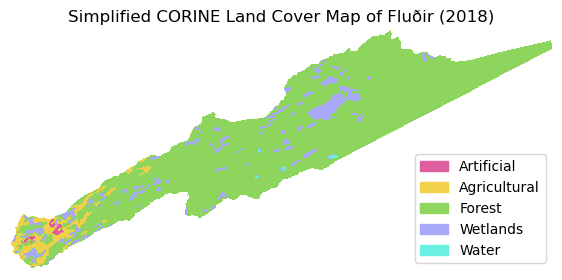

In [31]:
from rasterio.plot import show
import matplotlib.patches as mpatches

patches = [ mpatches.Patch(color=color_list[i], label=class_names[i]) for i in range(len(class_names)) ]

fig, ax = plt.subplots(figsize=(7,7))
show(al_cor_simple, ax=ax, cmap=ListedColormap(color_list))
ax.legend(handles=patches, loc='lower right' )
ax.axis('off')
ax.set_title("Simplified CORINE Land Cover Map of Fluðir (2018)");

## 4.2. Agricultural profile of Fluðir

[Go back to the "Table of contents"](#Table-of-contents)


As we have just seen, the agriculture category has several sub-classes in the CLC dataset. We can count the number of pixels in each category to determine the nature of the agricultural fabric in the region.

In [32]:
categories = leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(2))].Name.to_list()

color_list = color_list = [(leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(2))].R.iloc[i]/255,
               leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(2))].G.iloc[i]/255,
               leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(2))].B.iloc[i]/255) for i in range(len(leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(2))]))]

quantities = [np.where(al_cor == i, 1, 0).sum() for i in range(12, 23)]

data = pd.DataFrame( {'categories':categories, 'quantities': quantities})
data = data[(data.quantities != 0)]
data

,categories,quantities
6,Pastures,5606
8,Complex cultivation patterns,251


Text(0.5, 1.0, 'Composition of Fluðir agricultural fabric')

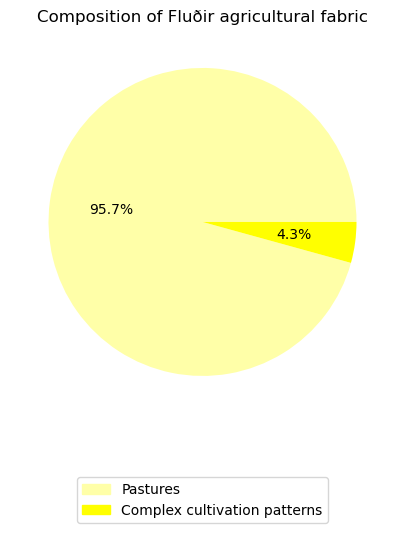

In [33]:
# plotting the proportions in a pie chart

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(data.quantities, autopct='%1.1f%%', colors=color_list)

patches = [ mpatches.Patch(color=color_list[i], label=data.categories.iloc[i]) for i in range(len(data)) ]
ax.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5,-0.3))
ax.set_title('Composition of Fluðir agricultural fabric')

# 5. Vegetation Phenology

[Go back to the "Table of contents"](#Table-of-contents)

## 5.1. Season Lengths

[Go back to the "Table of contents"](#Table-of-contents)


The Copernicus vegetation phenology dataset provides many different variables that allow us to monitor several aspects of the vegetation dynamics in Alsace. In this section we will take a look at the **length** of a season. The dataset derives its phenology parameter from the Leaf Area Index calculated from Sentinel-2 images, so here a season refers to the period of the year where the Leaf Area Index of the observed area is high.


| <img src="imgs/VPP_fig.png" width="600"> | 
|:--:| 
|  From the [Copernicus Vegetation Phenology and Productivity dataset User Guide](https://land.copernicus.eu/en/technical-library/product-user-manual-of-seasonal-trajectories/@@download/file): *Vegetation Phenology and Productivity parameters (VPPs) are: (a) start of season (date, PPI value and slope), (b) end of season (date, PPI value and slope), **(c) length of season**, (d) minimum of season, (e) peak of the season (date and PPI value), (f) amplitude, (g) small integrated value, (g+h) large integrated value.* |


The request to retrieve the data from Wekeo is located here : `data/LENGTH/length_req.json`. Once again we cropped the data to the Alsace for convenience. 

In [ ]:
# opening the season lengths datasets from 2017 to 2022 and storing them in a single variable

al_len = []
for i in range (2017, 2023):
    with rasterio.open('data/LENGTH/alsace_LENGTH_%d.tif' % i) as src:
        al_len.append(src.read(1))

al_len = np.array(al_len)


Let's take a first quick look at the dataset! Let's plot for example the year 2022.

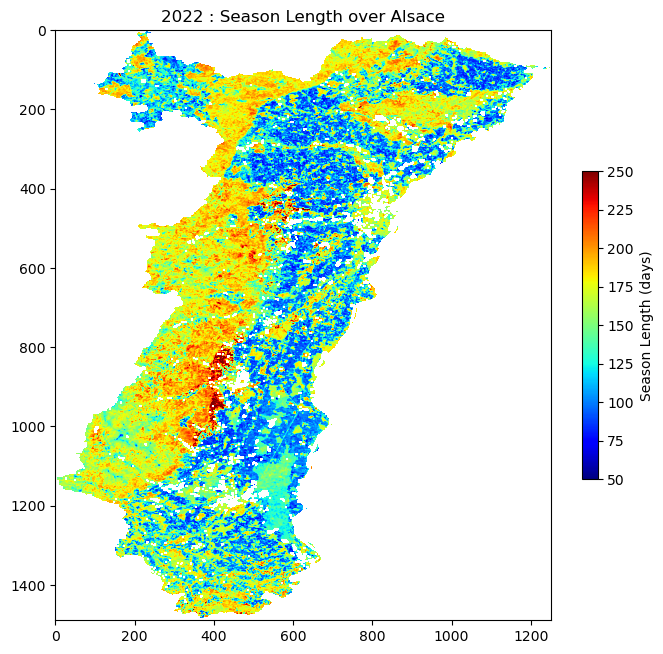

In [ ]:
al_len_2022 = al_len[5,:,:]

fig, ax = plt.subplots(figsize=(8,8))
im= ax.imshow(np.where(al_len_2022 == 0, np.nan, al_len_2022), cmap='jet', vmin = 50, vmax=250)
cbar = plt.colorbar(im, shrink = 0.5, label="Season Length (days)")
ax.set_title('2022 : Season Length over Alsace');

Thanks to a visual comparison with the CORINE Land Cover map (CLC), we can see that most of the "Forest" areas have the longer seasons, which makes sense. Let's have a closer at the agrilculture sub-categories to see if there are any disparities in season lengths.

In [ ]:
categories = leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(2))].Name.to_list()
data = {}

for c, cat in enumerate(categories):
    tmp = np.where(al_cor == leg[leg['Name'] == cat].index[0] +1, al_len_2022, np.nan).flatten()  # we select only the pixels of agriculture categories
    tmp = tmp[~np.isnan(tmp)]
    if len(tmp) >0:
        data[cat]= tmp




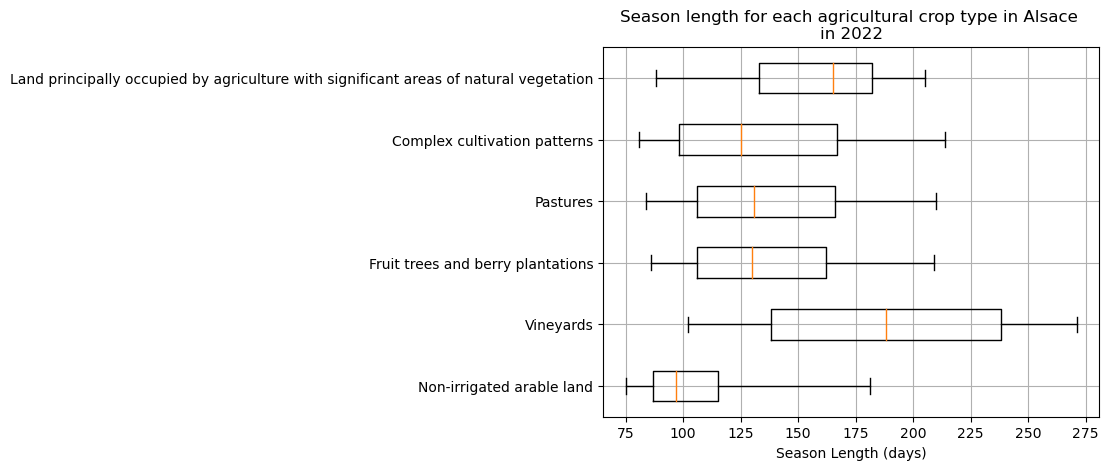

In [ ]:
fig, ax = plt.subplots()

ax.boxplot(list(data.values()), whis=[5, 95], vert = False, showfliers = False);
plt.xlabel('Season Length (days)')
ax.set_yticklabels(list(data.keys()))
ax.set_title('Season length for each agricultural crop type in Alsace \nin 2022')
ax.grid(True)

In [ ]:
categories = leg[leg['COPERNICUS ind'].astype(str).str.startswith(str(2))].Name.to_list()
data = {}

for c, cat in enumerate(categories):
    tmp = np.nanmedian(np.where(np.tile(al_cor,(6,1,1)) == leg[leg['Name'] == cat].index[0] +1, al_len, np.nan), axis=(1,2))  # we select only the pixels of agriculture categories
    tmp = tmp[~np.isnan(tmp)]
    if len(tmp) >0:
        data[cat]= tmp

Text(0.5, 1.0, 'Season duration by year and crop type over Elsass')

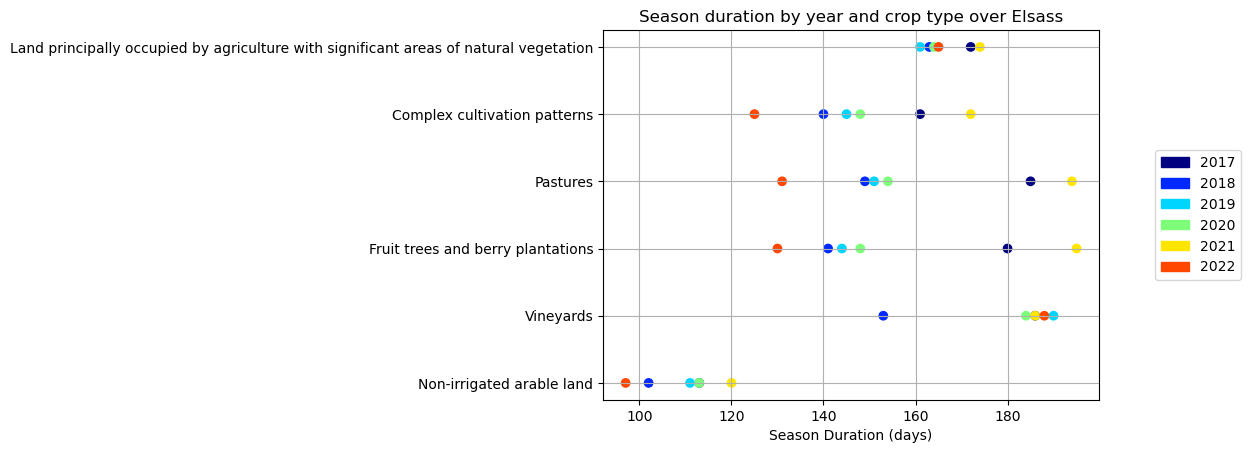

In [ ]:
fig, ax = plt.subplots()

import matplotlib
cmap = matplotlib.cm.get_cmap('jet')
rgba = cmap(0.5)

patches = [ mpatches.Patch(color=cmap(i/6), label=2017+i) for i in range(6) ]


for i, cat in enumerate(data.keys()):
    ax.scatter( data[cat], np.ones(len(data[cat]))*i , c=[cmap(i/6) for i in range(6)], cmap='jet')
ax.grid(True)

ax.set_yticks(range(6))
ax.set_yticklabels(list(data.keys()));

ax.legend(handles=patches, loc='right', bbox_to_anchor=(1.3,0.5));
ax.set_xlabel('Season Duration (days)')
ax.set_title("Season duration by year and crop type over Elsass")

We can see that for the same type of crop, the season can be very different from one year to another. Here for instance, the season for Fruit trees is more than 190 days long in 2021, but only 130 days long in 2022. In the next section we will take a closer look at the seasons, on order to see when they begin and when they end.

## 5.2. Focus on fruit trees and berry plantations

[Go back to the "Table of contents"](#Table-of-contents)


This time we will use the start of season date (**SOSD**) and the end of season date (**EOSD**). The dates are given in the following format : YYDOY. Example : 18030 --> day 30 in year 2018

In [ ]:
al_sosd = []
al_eosd = []

# opening the datasets
for i in range (2020, 2023):
    with rasterio.open('data/SOSD/alsace_SOSD_%d.tif' % i) as src:
        al_sosd.append(src.read(1))

for i in range (2020, 2023):
    with rasterio.open('data/EOSD/alsace_EOSD_%d.tif' % i) as src:
        al_eosd.append(src.read(1))
        
al_sosd = np.array(al_sosd)
al_eosd = np.array(al_eosd)


In [ ]:
def harmonize_SOSD(raster, year=None):
    # depending on the years, the SOSD and EOSD products don't always have the same processing baselines
    # this function is meant to harmonize them
    yy = year-2000
    tmp = np.where( raster == 635, 0, raster)
    tmp = np.where( (tmp != 0) & (tmp >= yy*1000 + 366) & (tmp < (yy+1)*1000), tmp - 635, tmp)
    tmp = np.where( (tmp != 0) & (tmp >= (yy+1)*1000 + 366), tmp - 635, tmp)
    
    return tmp


def yydoy_to_date(raster):
    # this function converts the YYDOY format to usual datetime format
    tmp = raster.astype(str)
    nl, nc = raster.shape
    #raster_dt = np.empty((nl,nc), dtype='datetime64[D]')
    raster_dt = np.zeros((nl,nc))
    for i in range(nl):
        for j in range(nc):
            if len(tmp[i,j]) == 5:
                raster_dt[i,j] = np.datetime64('20'+tmp[i,j][:2]+'-01-01').astype(int) + int(tmp[i,j][2:]) - 1
                #raster_dt[i,j] = np.datetime64('20'+tmp[i,j][:2]) + np.timedelta64(int(tmp[i,j][2:]) - 1, 'D')
    return raster_dt


In [ ]:
al_sosd[1,:,:] = harmonize_SOSD(al_sosd[1,:,:], year=2021)
al_sosd[2,:,:] = harmonize_SOSD(al_sosd[2,:,:], year=2022)

al_eosd[1,:,:] = harmonize_SOSD(al_eosd[1,:,:], year=2021)
al_eosd[2,:,:] = harmonize_SOSD(al_eosd[2,:,:], year=2022)

In [ ]:
tmp = yydoy_to_date(al_sosd[0,:,:])
sosd_dates1 = tmp[tmp != 0].flatten()

tmp = yydoy_to_date(al_sosd[1,:,:])
sosd_dates2 = tmp[tmp != 0].flatten()

tmp = yydoy_to_date(al_sosd[2,:,:])
sosd_dates3 = tmp[tmp != 0].flatten()


tmp = yydoy_to_date(al_eosd[0,:,:])
eosd_dates1 = tmp[tmp != 0].flatten()

tmp = yydoy_to_date(al_eosd[1,:,:])
eosd_dates2 = tmp[tmp != 0].flatten()

tmp = yydoy_to_date(al_eosd[2,:,:])
eosd_dates3 = tmp[tmp != 0].flatten()



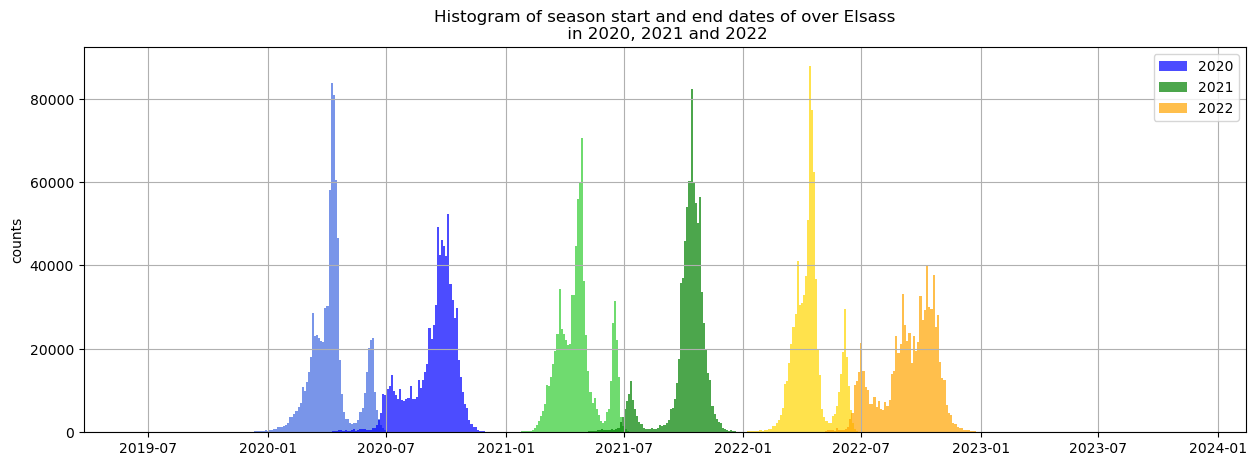

In [ ]:
# plotting
fig, ax = plt.subplots(figsize=(15,5))


ax.hist(pd.to_datetime(sosd_dates1, unit='D'), bins=200, color='royalblue', alpha=0.7);
ax.hist(pd.to_datetime(sosd_dates2, unit='D'), bins=200, color='limegreen', alpha=0.7);
ax.hist(pd.to_datetime(sosd_dates3, unit='D'), bins=200, color='gold', alpha=0.7);

ax.hist(pd.to_datetime(eosd_dates1, unit='D'), bins=200, color='blue', alpha=0.7, label='2020');
ax.hist(pd.to_datetime(eosd_dates2, unit='D'), bins=200, color='green', alpha=0.7, label='2021');
ax.hist(pd.to_datetime(eosd_dates3, unit='D'), bins=200, color='orange', alpha=0.7, label='2022');

ax.grid(True)
ax.set_title('Histogram of season start and end dates of over Elsass\n in 2020, 2021 and 2022')
ax.set_ylabel('counts')
ax.legend()

For each year, there are several peaks, that probably correspond to different types of vegetation. Now we are going to focus on fruit trees and berry plantations.

In [ ]:
# focus on fruit trees and berry plantations

sosd_median = []
eosd_median = []

for i in range(3):
    # in the CLC data, the pixel value for fruit trees and berry is 16
    tmp = np.where(al_cor == 16, al_sosd[i,:,:], 0)  
    tmp = yydoy_to_date(tmp)
    sosd_median.append(np.nanmedian(tmp[tmp!=0]))
    
    tmp = np.where(al_cor == 16, al_eosd[i,:,:], 0)
    tmp = yydoy_to_date(tmp)
    eosd_median.append(np.nanmedian(tmp[tmp!=0]))


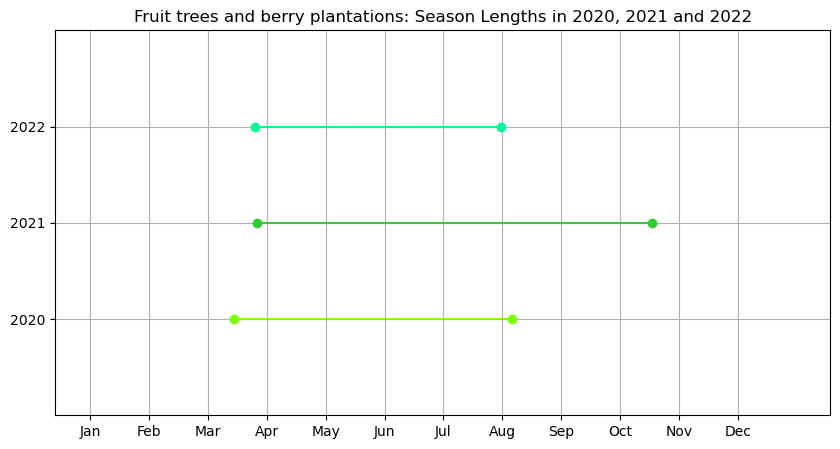

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

doy_sosd = pd.to_datetime(sosd_median, unit='D').dayofyear
doy_eosd = pd.to_datetime(eosd_median, unit='D').dayofyear

# setting up axes:
ax.plot(range(365), [0]*365, alpha=0)  # invisible line to set up the axes
ax.plot([doy_sosd[0], doy_eosd[0]], [1,1], marker='o', color='chartreuse')
ax.plot([doy_sosd[1], doy_eosd[1]], [2,2], marker='o', color='limegreen')
ax.plot([doy_sosd[2], doy_eosd[2]], [3,3], marker='o', color='mediumspringgreen')

ax.set_xticks([30.4*i for i in range(12)])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_yticks(range(1,4))
ax.set_yticklabels(['2020', '2021', '2022'])
ax.grid(True)
ax.set_ylim(0,4)
ax.set_title('Fruit trees and berry plantations: Season Lengths in 2020, 2021 and 2022');

We see that the 2020, 2021 and 2022 seasons all start roughly during the same period, however the 2021 season ends much later than the two others. In the next season we will investigate a little further and look at precipitation and temperature data.

# 6. Using Temperature and Precipitation data

[Go back to the "Table of contents"](#Table-of-contents)


Vegetation dynamics are driven by multiple factors, among which we find temperature and precipitation. Plant species may have specific temperature requirements to grow, and water availability is of course crucial. We have downloaded climate date from 2020 to 2022, the request to the WekEO API can be found here : `data/climate_data/climate_data_req.json`.

The dataset comprises a range of climatologies, monthly anomalies, and monthly mean fields for Essential Climate Variables (ECVs), designed to facilitate the monitoring and evaluation of climate variability and changes. To know more, do not hesitate to visit the [Copernicus](https://cds.climate.copernicus.eu/cdsapp#!/dataset/ecv-for-climate-change?tab=overview) dedicated page.

We have chosen to look at temperature and precipitation **anomalies**, with regards to the 1981-2010 reference period.


|   | Essential Climate Variables for assessment of climate variability from 1979 to present  | 
| :---: | :---:|
| **Variables used** | t2m, tp |
| **Product identifier** |[EO:ECMWF:DAT:ECV_FOR_CLIMATE_CHANGE](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3AECV_FOR_CLIMATE_CHANGE) | 
| **Spatial resolution** | 0.25° x 0.25°s| 
| **Temporal resolution** | monthly | 
| **Temporal coverage** | 1 January 1979 to 1 June 2023 | 
| | <img src="imgs/climate_thb.png" width="250"> |



The climate data files are *.netcdf* files. To open them with Python, we are going to use the **xarray** library. We have one file for each month, so first we are going to gather all the datasets into a single variable with the *concat* function from xarray.

In [ ]:
#  adding precipitation

import glob

# Define the data directory
data_dir='./data/climate_data/2t/'

# Collect all netcdf file names in the data directory
filenames=glob.glob(data_dir+'*.grib')

datasets = []
for f in filenames:
    ds_tmp = xr.open_dataset(f, engine='cfgrib', backend_kwargs={"indexpath": ''})
    date = np.datetime64(f[-25:-21]+'-'+f[-21:-19], 'D')
    ds_tmp['time'] = date
    datasets.append(ds_tmp)

ds_2t = xr.concat(datasets, dim='time')

ds_2t

<xarray.Dataset>
Dimensions:     (time: 36, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2020-12-01 2020-03-01 ... 2020-05-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 2020-12-01 2020-03-01 ... 2020-05-01
Data variables:
    t2m         (time, latitude, longitude) float32 3.452 3.452 ... 1.653 1.653
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-11-27T10:32 GRIB to CDM+CF via cfgrib-0.9.1...

We have now a full dataset containing the 3 years of temperature data. We now only need to sort the dates so they are in order. We will do the same with the longitude and latitude coordinates. Finally, we will also shift the longitudes, so they are in the -180° to 180° range instead of the 0° to 360° range.

In [ ]:
ds_2t.coords['longitude'] = (ds_2t.coords['longitude'] + 180) % 360 - 180
ds_2t = ds_2t.sortby(ds_2t.longitude)
ds_2t = ds_2t.sortby(ds_2t.latitude)
ds_2t = ds_2t.sortby(ds_2t.time)
ds_2t

<xarray.Dataset>
Dimensions:     (time: 36, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2022-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * longitude   (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    valid_time  (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2022-12-01
Data variables:
    t2m         (time, latitude, longitude) float32 -0.187 -0.187 ... 0.7909
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-11-27T10:32 GRIB to CDM+CF via cfgrib-0.9.1...

Now the next thing we want to do with the dataset is to subset it: let's use the *slice* function of xarray to select only a box around Alsace!

In [ ]:
# subset
lon_min = 6.5
lon_max = 8.5
lat_min = 47
lat_max = 49.5


ds_2t_al = ds_2t.sel(longitude = slice(lon_min, lon_max)).sel(latitude = slice(lat_min, lat_max))

ds_2t_al

<xarray.Dataset>
Dimensions:     (time: 36, latitude: 11, longitude: 9)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2022-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 47.0 47.25 47.5 47.75 ... 49.0 49.25 49.5
  * longitude   (longitude) float64 6.5 6.75 7.0 7.25 7.5 7.75 8.0 8.25 8.5
    valid_time  (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2022-12-01
Data variables:
    t2m         (time, latitude, longitude) float32 2.46 2.312 ... 0.905 0.9605
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-11-27T10:32 GRIB to CDM+CF via cfgrib-0.9.1...

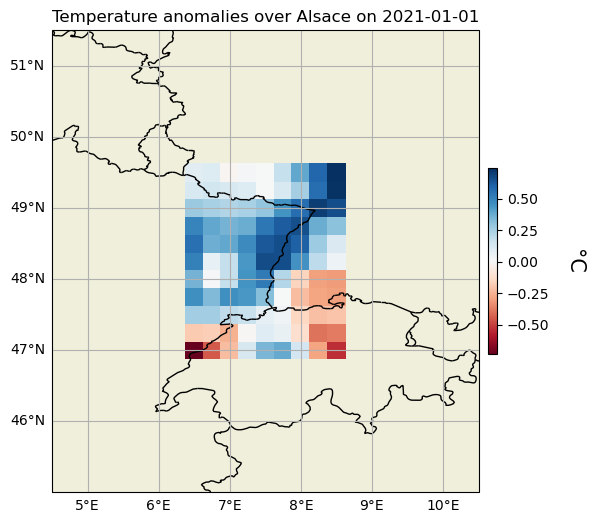

In [ ]:
# plotting the data on a map

date_plot = '2021-01-01'
temp_map = ds_2t_al['t2m'].sel(time=date_plot).squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(6, 6))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')  # add land mask
ax.add_feature(cfeature.BORDERS)  # add borders
ax.set_extent([lon_min-2, lon_max+2, lat_min-2, lat_max+2],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_map['longitude'].data, temp_map['latitude'].data, temp_map.data, cmap='RdBu')

ax.set_title('Temperature anomalies over Alsace on %s'%date_plot )

# Add the titles and legend
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('°C', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar

Next, we'll visualize the average anomalies aligned with the previously calculated seasons. Utilizing xarray, you can execute a spatial average on the data, yielding a time series.

In [ ]:
# spatial average

ds_2t_al_avg = ds_2t_al.mean(dim=['latitude','longitude'])

Repeating the same process with precipitation:

In [ ]:
# doing the exact same thing with precipitation data

import glob
# Define the data directory
data_dir='./data/climate_data/tp/'

# Collect all netcdf file names in the data directory
filenames=glob.glob(data_dir+'*.grib')

datasets = []
for f in filenames:
    ds_tmp = xr.open_dataset(f, engine='cfgrib', backend_kwargs={"indexpath": ''})
    date = np.datetime64(f[-25:-21]+'-'+f[-21:-19], 'D')
    ds_tmp['time'] = date
    datasets.append(ds_tmp)

ds_tp = xr.concat(datasets, dim='time')

# sort data + longitude shift
ds_tp.coords['longitude'] = (ds_tp.coords['longitude'] + 180) % 360 - 180
ds_tp = ds_tp.sortby(ds_tp.longitude)
ds_tp = ds_tp.sortby(ds_tp.latitude)
ds_tp = ds_tp.sortby(ds_tp.time)


# subset
lon_min = 6.5
lon_max = 8.5
lat_min = 47
lat_max = 49.5


ds_tp_al = ds_tp.sel(longitude = slice(lon_min, lon_max)).sel(latitude = slice(lat_min, lat_max))

#spatial average
ds_tp_al_avg = ds_tp_al.mean(dim=['latitude','longitude'])

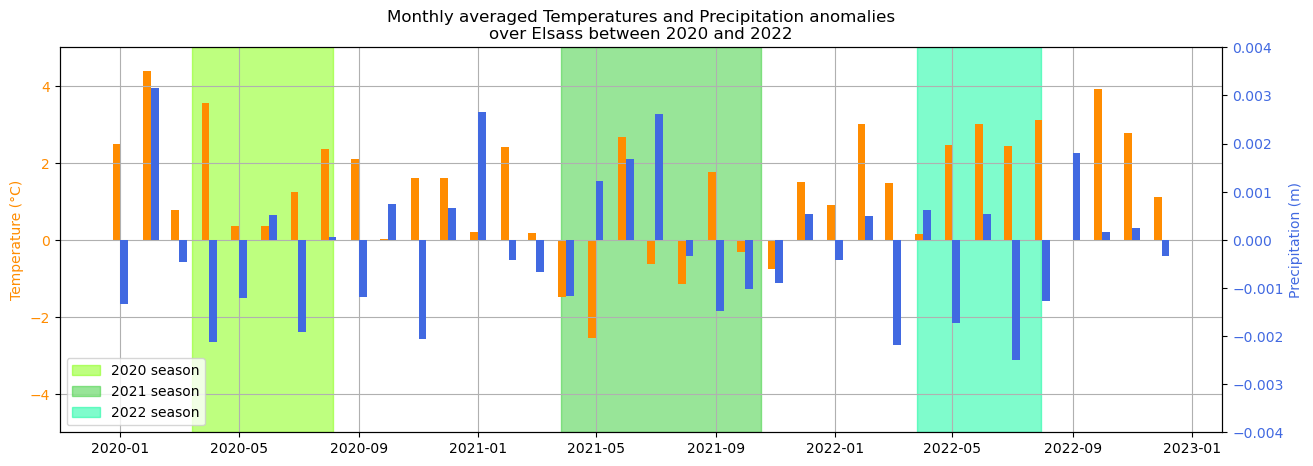

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))


ax.fill_betweenx(y=[-5,5],
                 x1=pd.to_datetime(sosd_median[0], unit='D'),
                 x2=pd.to_datetime(eosd_median[0], unit='D'),
                 alpha=0.5,
                 color = 'chartreuse',
                 label = '2020 season')

ax.fill_betweenx(y=[-5,5],
                 x1=pd.to_datetime(sosd_median[1], unit='D'),
                 x2=pd.to_datetime(eosd_median[1], unit='D'),
                 alpha=0.5,
                 color = 'limegreen',
                 label = '2021 season')

ax.fill_betweenx(y=[-5,5],
                 x1=pd.to_datetime(sosd_median[2], unit='D'),
                 x2=pd.to_datetime(eosd_median[2], unit='D'),
                 alpha=0.5,
                 color = 'mediumspringgreen',
                 label = '2022 season')


color = 'darkorange'
vals_2t = ds_2t_al_avg['t2m'].data
dates_2t = ds_2t_al_avg['time'].data.astype('datetime64[D]') - np.timedelta64(4)

vals_tp = ds_tp_al_avg['tp'].data
dates_tp = ds_tp_al_avg['time'].data.astype('datetime64[D]') + np.timedelta64(4)

ax.bar(dates_2t, vals_2t, color=color, width=8)
ax.tick_params(axis='y', labelcolor=color)
ax.set_ylim(-5,5)
ax.set_ylabel('Temperature (°C)', color=color)

ax2 = ax.twinx()
color = 'royalblue'
ax2.bar(dates_tp, vals_tp, color=color, width=8)

ax2.set_ylim(-0.004,0.004)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Precipitation (m)', color=color)

ax.grid(True)
ax.legend()
ax.set_title('Monthly averaged Temperatures and Precipitation anomalies\nover Elsass between 2020 and 2022');

The analysis reveals a notably humid early season in 2021, contrasting with pronounced precipitation deficits in the region for both 2020 and 2022. Throughout most of the season, 2021 experienced relatively average temperatures, whereas 2022 stood out for its exceptionally high temperatures. Consequently, temperature and, notably, precipitation appear to be critical factors influencing the extended duration of the 2021 season.

# 7. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook we have studied the dynamics of the vegetation in alsace over the last few years. We highlighted the yearly variability of the seasons, and how it could be explained by climate factors like temperature and precipitation.

# 8. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions.

**Beginners** :

- In [Section 6](#6.-Using-Temperature-and-Precipitation-data) we have plotted the Temperature Anomaly at a specific date. Try exploring other dates, or even looking at general statistics like the mean or the median over an entire year of data.

- In [Section 4.2](#4.2.-Agricultural-profile-of-Alsace), try generating a pie chart for the forested areas in Alsace to understand their composition and distribution.

**Intermediate** :

- In [Section 5](#5.-Vegetation-Phenology), we analyzed the seasons for Fruit trees and berry plantations. You can try to do the same analysis over other agricultural crops, like vineyards.

- We performed our analysis on Alsace, however the datasets we used provide data for all of Europe. Try to redo a similar analysis on another area!


<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study the vegetation and land cover variables. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) !

# Additional Information
---

#### Compatible Data Science Toolkits

In [ ]:
import pkg_resources; pkg_resources.get_distribution("hda").version

In [ ]:
import xarray; print(xarray.__version__)

#### Last Modified and Tested

In [ ]:
import xarray; print(xarray.__version__)

2023.5.0


<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>